In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as ks
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessRegressor as gpr 
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, RBF, RationalQuadratic, ExpSineSquared, Matern, Exponentiation

In [6]:
df = pd.read_excel('./Gibbs energy inference.xlsx')
df_Fe_C = pd.read_excel('./Fe-C system.xlsx')
df_Fe_Cr = pd.read_excel('./Fe-Cr system.xlsx')
df_Fe_C_Cr = pd.read_excel('./Fe-C-Cr system.xlsx')

In [7]:
df_Fe_C_1=df_Fe_C.reindex(columns=['Wt-% Cr','Wt-% C', 'T/K', 'Gibbs_energy/J/mol'], fill_value=0)

In [8]:
df_Fe_Cr_1=df_Fe_Cr.reindex(columns=['Wt-% Cr','Wt-% C', 'T/K', 'Gibbs_energy/J/mol'], fill_value=0)

In [9]:
df=pd.concat([df_Fe_C_1,df_Fe_Cr_1,df_Fe_C_Cr]).reset_index(drop=True)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaler = pd.DataFrame(scaler.fit_transform(df))

In [11]:
Train = df_scaler.loc[:95].rename(columns={0:'Wt-% Cr',1:'Wt-% C',2:'T/K',3:'Gibbs_energy/J/mol'})

In [12]:
Test = df_scaler.loc[96:].reset_index(drop=True).rename(columns={0:'Wt-% Cr',1:'Wt-% C',2:'T/K',3:'Gibbs_energy/J/mol'})

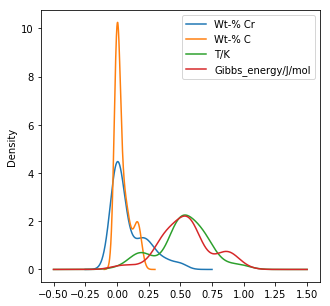

In [13]:
Train.plot(kind = 'kde', figsize = (5, 5))

In [14]:
Gaussian= gpr(alpha = 0.0001,n_restarts_optimizer=5,normalize_y="True",optimizer='fmin_l_bfgs_b',random_state=42)
#kernel=k,alpha = 0.0001,n_restarts_optimizer=5,normalize_y="True",optimizer='fmin_l_bfgs_b',random_state=42)
Gaussian.fit(Train[['Wt-% Cr','Wt-% C', 'T/K']],Train['Gibbs_energy/J/mol'])

GaussianProcessRegressor(alpha=0.0001, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=5, normalize_y='True',
                         optimizer='fmin_l_bfgs_b', random_state=42)

In [15]:
y_prediction=Gaussian.predict(Test[['Wt-% Cr','Wt-% C', 'T/K']])

In [16]:
y_prediction

array([0.59108081, 0.46131501, 0.33230424, 0.33024273, 0.58891151,
       0.64056851, 0.61756255, 0.50143409, 0.80823963, 0.31113611,
       0.30839167, 0.48582296, 0.74799793, 0.56318298, 0.6122341 ,
       0.46237685])

In [149]:
np.array(Test['Gibbs_energy/J/mol'])

array([0.58214092, 0.45530222, 0.32987302, 0.32491439, 0.58019074,
       0.63402247, 0.58600584, 0.49589399, 0.78748743, 0.2956694 ,
       0.30661721, 0.43103897, 0.66929823, 0.39791365, 0.50687877,
       0.42486956])

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_prediction,np.array(Test['Gibbs_energy/J/mol']))

0.03466780379866186

In [146]:
def Mean_absolute_percentage_error(ture_value, prediction_value):
    return np.mean(np.abs((prediction_value- ture_value))/ture_value)*100

In [147]:
Mean_absolute_percentage_error(Test['Gibbs_energy/J/mol'].values,y_prediction)

7.3957131867002035

In [139]:
Gaussian.score(Test[['Wt-% Cr','Wt-% C', 'T/K']],Test['Gibbs_energy/J/mol'])

0.8350965802073895